<img src="https://drive.google.com/uc?export=view&id=1wYSMgJtARFdvTt5g7E20mE4NmwUFUuog" width="200">

[![Gen AI Experiments](https://img.shields.io/badge/Gen%20AI%20Experiments-GenAI%20Bootcamp-blue?style=for-the-badge&logo=artificial-intelligence)](https://github.com/buildfastwithai/gen-ai-experiments)
[![Gen AI Experiments GitHub](https://img.shields.io/github/stars/buildfastwithai/gen-ai-experiments?style=for-the-badge&logo=github&color=gold)](http://github.com/buildfastwithai/gen-ai-experiments)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/17kU4014PjqrQDDwsPpDJalq1Rzm8xdEl?usp=sharing)

## Master Generative AI in 8 Weeks
**What You'll Learn:**
- Build with Latest LLMs
- Create Custom AI Apps
- Learn from Industry Experts
- Join Innovation Community

Learn more about Our Bootcamp: https://www.buildfastwithai.com/genai-course

# 🐝 Kimi K2.5 Agent Swarm Cookbook

**A Comprehensive Guide to Parallel Multi-Agent Intelligence**

---

## 📚 Table of Contents

1. [Introduction to Agent Swarm](#introduction)
2. [Setup & Configuration](#setup)
3. [Understanding Parallel-Agent Reinforcement Learning (PARL)](#parl)
4. [Basic Examples](#basic-examples)
5. [Advanced Swarm Use Cases](#advanced)
6. [Performance Analysis](#performance)
7. [Real-World Applications](#real-world)

---

## 🎯 What Makes Kimi K2.5 Agent Swarm Extraordinary?

Kimi K2.5 introduces **self-directed agent swarms** that can:

- **Scale to 100 sub-agents** executing in parallel
- **Coordinate up to 1,500 tool calls** across workflows
- **Reduce execution time by 3-4.5×** compared to single-agent setups
- **Automatically decompose tasks** without predefined workflows
- **Optimize critical path latency** using PARL (Parallel-Agent Reinforcement Learning)

This cookbook demonstrates practical implementations and use cases you can run yourself!

<a id='introduction'></a>

## 1. Introduction to Agent Swarm

### What is Agent Swarm?

Traditional AI agents work **sequentially** - one task after another. Kimi K2.5's Agent Swarm paradigm enables **parallel execution** where multiple specialized sub-agents work simultaneously on different parts of a complex problem.

### Key Concepts

**1. Orchestrator Agent**
- Automatically decomposes complex tasks into parallelizable subtasks
- Dynamically creates specialized sub-agents (e.g., "AI Researcher", "Physics Researcher", "Fact Checker")
- Coordinates execution without predefined roles

**2. Critical Path Optimization**
- Measures performance using **Critical Steps** (latency-oriented metric)
- Focuses on the slowest sub-agent at each stage
- Ensures parallelism actually improves speed, not just token throughput

**3. PARL Training**
- Uses staged reward shaping to encourage parallelism early
- Gradually shifts focus toward task success
- Prevents "serial collapse" where orchestrator defaults to single-agent execution

### Why It Matters

In real-world scenarios:
- **Research tasks** that take hours can complete in minutes
- **Complex multi-domain analysis** becomes feasible
- **Resource-intensive workflows** scale efficiently
- **Time-sensitive projects** benefit from parallel execution

<a id='setup'></a>

## 2. Setup & Configuration

### Prerequisites

You'll need:
- An OpenRouter API key (get one at https://openrouter.ai/)
- Python 3.8+
- Required packages (install below)

In [13]:
# Install required packages
!pip install requests pandas matplotlib seaborn openpyxl -q

In [14]:
# Import libraries
import os
import time
import json
import textwrap
from concurrent.futures import ThreadPoolExecutor, as_completed
from typing import List, Dict, Optional
import pandas as pd
import requests
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [15]:
# Configuration
# IMPORTANT: Set your OpenRouter API key here or as an environment variable
# You can get your API key from: https://openrouter.ai/keys

API_KEY = os.getenv("OPENROUTER_API_KEY", "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")
MODEL_NAME = "moonshotai/Kimi-K2.5"  # Kimi K2.5 via OpenRouter

# API Configuration
OPENROUTER_URL = "https://openrouter.ai/api/v1/chat/completions"

print("✅ Configuration loaded")
print(f"Model: {MODEL_NAME}")
print(f"API Key: {'✅ Set' if API_KEY != 'your-api-key-here' else '❌ Not set - please configure!'}")

✅ Configuration loaded
Model: moonshotai/Kimi-K2.5
API Key: ✅ Set


### Core API Function

This function handles communication with Kimi K2.5 via OpenRouter:

In [16]:
def call_kimi_api(
    api_key: str,
    model: str,
    prompt: str,
    system_prompt: str,
    temperature: float = 1.0,
    top_p: float = 0.95,
    max_tokens: Optional[int] = None
) -> str:
    """
    Calls Kimi K2.5 via OpenRouter Chat Completions API.

    Args:
        api_key: Your OpenRouter API key
        model: Model identifier (e.g., 'moonshotai/Kimi-K2.5')
        prompt: User message/prompt
        system_prompt: System instruction for the agent
        temperature: Sampling temperature (default: 1.0)
        top_p: Nucleus sampling parameter (default: 0.95)
        max_tokens: Maximum tokens in response (optional)

    Returns:
        Response content as string
    """
    if not api_key or api_key == "your-api-key-here":
        raise ValueError("Missing API key. Please set OPENROUTER_API_KEY environment variable or update API_KEY in the config cell.")

    headers = {
        "Authorization": f"Bearer {api_key}",
        "Content-Type": "application/json",
        "HTTP-Referer": "https://github.com",  # Optional: for attribution
        "X-Title": "Kimi K2.5 Agent Swarm Cookbook",
    }

    payload = {
        "model": model,
        "temperature": temperature,
        "top_p": top_p,
        "messages": [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": prompt},
        ],
    }

    if max_tokens:
        payload["max_tokens"] = max_tokens

    try:
        resp = requests.post(OPENROUTER_URL, json=payload, headers=headers, timeout=180)
        resp.raise_for_status()

        data = resp.json()
        return data["choices"][0]["message"]["content"].strip()
    except requests.exceptions.RequestException as e:
        raise RuntimeError(f"API request failed: {e}")
    except KeyError as e:
        raise RuntimeError(f"Unexpected API response format: {resp.json()}")

<a id='parl'></a>

## 3. Understanding PARL (Parallel-Agent Reinforcement Learning)

### How PARL Works

PARL trains an orchestrator agent that:

1. **Decomposes tasks** into parallelizable subtasks
2. **Instantiates frozen sub-agents** dynamically
3. **Runs subtasks concurrently** to reduce latency
4. **Optimizes critical path** (slowest sub-agent) rather than total steps

### Reward Function

The training uses a staged reward:

```
R = λ(t) × R_parallel + (1 - λ(t)) × R_task
```

Where:
- `λ(t)` anneals from 1 → 0 during training
- Early: encourages parallelism (`R_parallel`)
- Later: focuses on task quality (`R_task`)

### Critical Steps Metric

Instead of counting total steps, PARL uses:

```
Critical Steps = Orchestration Overhead + max(Sub-agent Steps)
```

This ensures parallelism actually improves speed!

<a id='basic-examples'></a>

## 4. Basic Examples

### Example 1: Single Agent vs Swarm - Simple Comparison

Let's start with a simple demonstration of sequential vs parallel execution:

In [17]:
def build_system_prompt() -> str:
    """System prompt for Kimi K2.5 Agent Swarm."""
    return textwrap.dedent("""
        You are Kimi K2.5, a state-of-the-art, open-source, multimodal AI agent.

        Core capabilities:
        - Self-directed agent swarm with up to 100 sub-agents
        - Up to 1,500 coordinated tool calls
        - Strong performance on coding, vision, and agentic search
        - Excellent at structured research and analysis

        Provide clear, actionable, well-structured responses.
    """).strip()


def run_single_agent_task(
    task: str,
    api_key: str,
    model: str,
    system_prompt: str
) -> Dict:
    """Run a single agent task and measure execution time."""
    start_time = time.time()

    try:
        response = call_kimi_api(
            api_key=api_key,
            model=model,
            prompt=task,
            system_prompt=system_prompt
        )
        success = True
        error = None
    except Exception as e:
        response = ""
        success = False
        error = str(e)

    duration = time.time() - start_time

    return {
        "task": task,
        "success": success,
        "response": response,
        "duration": duration,
        "error": error
    }


def run_sequential(tasks: List[str], api_key: str, model: str) -> List[Dict]:
    """Run tasks sequentially (one after another)."""
    system_prompt = build_system_prompt()
    results = []

    for task in tasks:
        result = run_single_agent_task(task, api_key, model, system_prompt)
        results.append(result)

    return results


def run_parallel_swarm(tasks: List[str], api_key: str, model: str, max_workers: int = 5) -> List[Dict]:
    """Run tasks in parallel using thread pool (simulating agent swarm)."""
    system_prompt = build_system_prompt()
    results = []

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {
            executor.submit(run_single_agent_task, task, api_key, model, system_prompt): task
            for task in tasks
        }

        for future in as_completed(futures):
            result = future.result()
            results.append(result)

    return results

### Example Simple Research Tasks Comparison

Let's compare sequential vs parallel execution on 5 research tasks:

In [18]:
# Example tasks (smaller for demo purposes)
demo_tasks = [
    "Research and summarize the top 3 trends in AI agents in 2025. Keep it brief (2-3 sentences).",
    "Research and summarize the top 3 trends in frontend development in 2025. Keep it brief (2-3 sentences).",
    "Research and summarize the top 3 trends in ML Ops in 2025. Keep it brief (2-3 sentences).",
    "Research and summarize the top 3 trends in cybersecurity in 2025. Keep it brief (2-3 sentences).",
    "Research and summarize the top 3 trends in UI/UX design in 2025. Keep it brief (2-3 sentences).",
]

print("📊 Running comparison: Sequential vs Parallel Swarm")
print("=" * 60)

# Sequential execution
print("\n🔄 Running SEQUENTIALLY (one task at a time)...")
seq_start = time.time()
seq_results = run_sequential(demo_tasks, API_KEY, MODEL_NAME)
seq_total_time = time.time() - seq_start

print(f"✅ Sequential completed in {seq_total_time:.2f} seconds")
print(f"   Average per task: {seq_total_time/len(demo_tasks):.2f} seconds")




# Parallel execution
print("\n🐝 Running PARALLEL SWARM (all tasks simultaneously)...")
par_start = time.time()
par_results = run_parallel_swarm(demo_tasks, API_KEY, MODEL_NAME, max_workers=5)
par_total_time = time.time() - par_start

print(f"✅ Parallel swarm completed in {par_total_time:.2f} seconds")
print(f"   Critical path (slowest agent): {max(r['duration'] for r in par_results):.2f} seconds")




# Comparison
speedup = seq_total_time / par_total_time if par_total_time > 0 else 0
print("\n" + "=" * 60)
print(f"📈 SPEEDUP: {speedup:.2f}× faster with parallel swarm!")
print(f"   Sequential: {seq_total_time:.2f}s")
print(f"   Parallel:   {par_total_time:.2f}s")
print(f"   Time saved: {seq_total_time - par_total_time:.2f}s")

📊 Running comparison: Sequential vs Parallel Swarm

🔄 Running SEQUENTIALLY (one task at a time)...
✅ Sequential completed in 56.45 seconds
   Average per task: 11.29 seconds

🐝 Running PARALLEL SWARM (all tasks simultaneously)...
✅ Parallel swarm completed in 21.63 seconds
   Critical path (slowest agent): 21.63 seconds

📈 SPEEDUP: 2.61× faster with parallel swarm!
   Sequential: 56.45s
   Parallel:   21.63s
   Time saved: 34.82s


In [19]:
seq_results

[{'task': 'Research and summarize the top 3 trends in AI agents in 2025. Keep it brief (2-3 sentences).',
  'success': True,
  'response': 'The dominant trends in AI agents for 2025 center on **multi-agent orchestration**, where swarms of specialized agents collaborate on complex workflows, and **autonomous agentic execution** powered by advanced reasoning models that enable end-to-end task completion with minimal human oversight. Additionally, deep **enterprise integration** through standardized protocols like MCP (Model Context Protocol) and "computer use" capabilities allows agents to seamlessly operate existing software tools and business systems. These advances are shifting AI from conversational interfaces to autonomous digital workers capable of planning, executing, and coordinating multi-step business processes.',
  'duration': 13.925848722457886,
  'error': None},
 {'task': 'Research and summarize the top 3 trends in frontend development in 2025. Keep it brief (2-3 sentences).

In [20]:
par_results

[{'task': 'Research and summarize the top 3 trends in frontend development in 2025. Keep it brief (2-3 sentences).',
  'success': True,
  'response': 'AI-augmented development tools are transforming how developers write and maintain UI code, shifting focus from manual implementation to architectural oversight. Server-first rendering patterns like React Server Components and partial hydration are becoming the default, minimizing client-side JavaScript while preserving interactivity. Meanwhile, WebAssembly and edge computing are expanding frontend capabilities to handle compute-intensive tasks directly in the browser and at the network edge.',
  'duration': 12.28251600265503,
  'error': None},
 {'task': 'Research and summarize the top 3 trends in ML Ops in 2025. Keep it brief (2-3 sentences).',
  'success': True,
  'response': 'The dominant trend in 2025 is the shift from traditional MLOps to **LLMOps and Agentic AI orchestration**, as organizations manage complex compound systems with m

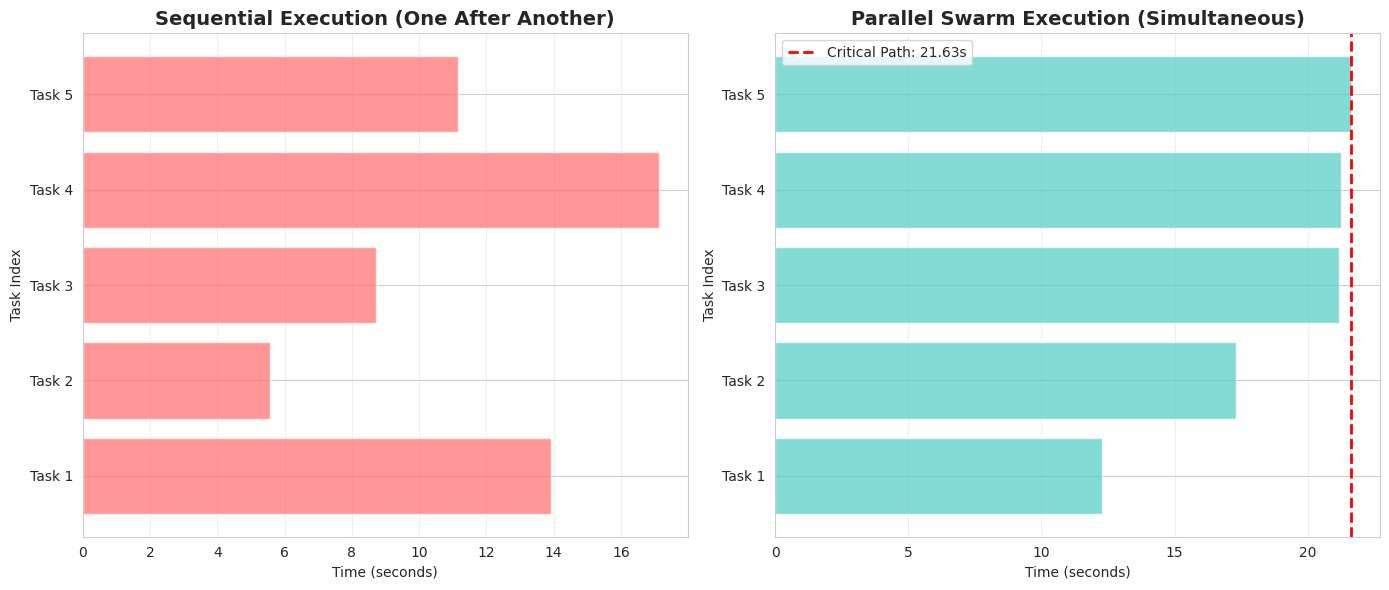


💡 Key Insight: In parallel execution, total time ≈ critical path (21.63s)
   vs sequential which sums all task times (56.45s)


In [21]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

seq_times = [r['duration'] for r in seq_results]
seq_cumulative = [sum(seq_times[:i+1]) for i in range(len(seq_times))]

ax1.barh(range(len(demo_tasks)), seq_times, color='#FF6B6B', alpha=0.7)
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Task Index')
ax1.set_title('Sequential Execution (One After Another)', fontsize=14, fontweight='bold')
ax1.set_yticks(range(len(demo_tasks)))
ax1.set_yticklabels([f'Task {i+1}' for i in range(len(demo_tasks))])
ax1.grid(axis='x', alpha=0.3)

par_times = [r['duration'] for r in par_results]
par_max_time = max(par_times)

ax2.barh(range(len(demo_tasks)), par_times, color='#4ECDC4', alpha=0.7)
ax2.axvline(par_max_time, color='red', linestyle='--', linewidth=2, label=f'Critical Path: {par_max_time:.2f}s')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Task Index')
ax2.set_title('Parallel Swarm Execution (Simultaneous)', fontsize=14, fontweight='bold')
ax2.set_yticks(range(len(demo_tasks)))
ax2.set_yticklabels([f'Task {i+1}' for i in range(len(demo_tasks))])
ax2.legend()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 Key Insight: In parallel execution, total time ≈ critical path ({par_max_time:.2f}s)")
print(f"   vs sequential which sums all task times ({seq_total_time:.2f}s)")


## Swarm Use Cases

###  Multi-Domain Research Swarm

This demonstrates the **"100 Sub-agents Hunting for Creators"** use case from the Kimi docs:

In [22]:
def build_research_system_prompt() -> str:
    """System prompt for research-focused agent swarm."""
    return textwrap.dedent("""
        You are a specialized research agent in a Kimi K2.5 Agent Swarm.

        Your role: Conduct deep research on a specific domain and identify:
        1. Top 3-5 creators (researchers, YouTubers, X accounts, blogs, open-source orgs)
        2. Top 3-5 tools/platforms/libraries
        3. Top 3-5 papers/deep-dive resources

        Provide structured, actionable results with brief descriptions for each item.
        Focus on high-signal, up-to-date, practitioner-friendly resources.
    """).strip()


def build_research_prompt(domain: str, goal: str, extra_instructions: str = "") -> str:
    """Build research prompt for a specific domain."""
    base_prompt = f"""
        Research Goal: {goal}

        Target Domain: {domain}

        Please provide:
        1. Top 3-5 creators in this domain (with brief descriptions)
        2. Top 3-5 tools/platforms/libraries (with use cases)
        3. Top 3-5 papers/resources (with key takeaways)

        Format your response clearly with sections for each category.
    """

    if extra_instructions:
        base_prompt += f"\n\nAdditional Instructions: {extra_instructions}"

    return textwrap.dedent(base_prompt).strip()


def run_domain_research_swarm(
    domains: List[str],
    research_goal: str,
    api_key: str,
    model: str,
    max_workers: int = 10,
    extra_instructions: str = ""
) -> Dict:
    """
    Run a research swarm across multiple domains in parallel.

    Returns:
        Dictionary with results, timing, and statistics
    """
    system_prompt = build_research_system_prompt()
    results = []

    print(f"🐝 Launching Agent Swarm for {len(domains)} domains...")
    print(f"   Max parallel workers: {max_workers}")
    print(f"   Research goal: {research_goal[:80]}...")

    start_time = time.time()

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {
            executor.submit(
                run_single_agent_task,
                build_research_prompt(domain, research_goal, extra_instructions),
                api_key,
                model,
                system_prompt
            ): domain
            for domain in domains
        }

        completed = 0
        for future in as_completed(futures):
            domain = futures[future]
            completed += 1

            try:
                result = future.result()
                result['domain'] = domain
                results.append(result)

                status = "✅" if result['success'] else "❌"
                print(f"   {status} [{completed}/{len(domains)}] {domain}: {result['duration']:.1f}s")
            except Exception as e:
                print(f"   ❌ [{completed}/{len(domains)}] {domain}: Error - {e}")
                results.append({
                    'domain': domain,
                    'success': False,
                    'error': str(e),
                    'duration': 0,
                    'response': ''
                })

    total_time = time.time() - start_time
    critical_path = max((r['duration'] for r in results if r.get('success')), default=0.0)

    return {
        'results': results,
        'total_wall_clock_time': total_time,
        'critical_path_time': critical_path,
        'domains_count': len(domains),
        'successful_count': sum(1 for r in results if r.get('success')),
        'failed_count': sum(1 for r in results if not r.get('success'))
    }

### Example: Research Swarm Across 7 Domains

Let's run a research swarm to find top creators, tools, and resources across multiple AI/tech domains:

In [ ]:
# Define domains to research
research_domains = [
    "Cybersecurity",
    "UI/UX Design",
    "Data Engineering",
    "DevOps",
    "Cloud Computing",
    "Mobile Development",
    "Blockchain Technology",
]

research_goal = "Find the top creators, tools, and deep-dive resources for each domain so builders can ramp up quickly."

# Run the swarm
swarm_results = run_domain_research_swarm(
    domains=research_domains,
    research_goal=research_goal,
    api_key=API_KEY,
    model=MODEL_NAME,
    max_workers=7,
    extra_instructions="Focus on practical, implementation-focused resources from the last 2-3 years."
)

print("\n" + "=" * 70)
print("📊 SWARM EXECUTION SUMMARY")
print("=" * 70)
print(f"Total domains researched: {swarm_results['domains_count']}")
print(f"Successful: {swarm_results['successful_count']}")
print(f"Failed: {swarm_results['failed_count']}")
print(f"\n⏱️  Timing:")
print(f"   Wall-clock time (total): {swarm_results['total_wall_clock_time']:.2f} seconds")
print(f"   Critical path (slowest): {swarm_results['critical_path_time']:.2f} seconds")
print(f"\n💡 If run sequentially, estimated time: {swarm_results['critical_path_time'] * swarm_results['domains_count']:.2f} seconds")
print(f"   Speedup: ~{swarm_results['critical_path_time'] * swarm_results['domains_count'] / swarm_results['total_wall_clock_time']:.1f}× faster!")

🐝 Launching Agent Swarm for 7 domains...
   Max parallel workers: 7
   Research goal: Find the top creators, tools, and deep-dive resources for each domain so builder...


In [ ]:
# Display results in a structured table
results_df = pd.DataFrame([
    {
        'Domain': r.get('domain', 'Unknown'),
        'Status': '✅ Success' if r.get('success') else '❌ Failed',
        'Duration (s)': f"{r.get('duration', 0):.1f}",
        'Response Preview': r.get('response', r.get('error', ''))[:100] + '...' if r.get('response') or r.get('error') else 'N/A'
    }
    for r in swarm_results['results']
])

print("\n📋 Detailed Results:")
display(results_df)

## 🎓 Key Takeaways

### What Makes Kimi K2.5 Agent Swarm Unique:

1. **Self-Directed Orchestration**: No predefined workflows - the orchestrator automatically decomposes tasks
2. **Massive Parallelism**: Up to 100 sub-agents and 1,500 tool calls
3. **Critical Path Optimization**: Focuses on latency, not just throughput
4. **Real-World Performance**: 3-4.5× speedup on complex tasks
5. **Production Ready**: Strong performance on BrowseComp, WideSearch, DeepSearchQA benchmarks

### When to Use Agent Swarm:

✅ **Perfect for:**
- Multi-domain research tasks
- Parallel code generation/review
- Competitive intelligence gathering
- Content creation pipelines
- Large-scale data analysis
- Complex problem decomposition

❌ **Not ideal for:**
- Simple, single-step tasks
- Tasks with strict sequential dependencies
- Very small workloads (overhead may outweigh benefits)

---

## 📚 Additional Resources

- **Kimi K2.5 Documentation**: See http://kimi.com/blog/kimi-k2-5.html for full capabilities
- **OpenRouter API**: https://openrouter.ai/docs
- **Kimi Code**: Open-source coding product with Agent Swarm support

---

## 🚀 Next Steps

1. Experiment with different swarm sizes (2, 5, 10, 20+ agents)
2. Try combining Agent Swarm with vision capabilities (image/video inputs)
3. Build custom orchestrators for domain-specific tasks
4. Measure performance improvements on your own use cases

**Happy Swarming! 🐝**